In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()
#將圖片數字標準化，直接除以255，讓每個數字可介於0~1之間
x_train, x_test = x_train / 255.0, x_test / 255.0

#60000 張圖片的資料集，每一張 32 x 32大小，10種分類


170500096/170498071 [==============================] - 19s 0us/step


In [10]:
print("Train x shape:",x_train.shape)

print()

print("Train y shape:",y_train.shape)
print()
print('data type :',type(x_train))

Train x shape: (50000, 32, 32, 3)

Train y shape: (50000, 1)

data type : <class 'numpy.ndarray'>


In [11]:
model =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dense(10,activation ='softmax')
    
    
    ])

In [12]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

history=model.fit(x_train,y_train,epochs = 10,
                 validation_data = (x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5407 - accuracy: 0.4342 - val_loss: 1.2680 - val_accuracy: 0.5422
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.1679 - accuracy: 0.5831 - val_loss: 1.1715 - val_accuracy: 0.5792
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.0202 - accuracy: 0.6398 - val_loss: 1.0049 - val_accuracy: 0.6464
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.9327 - accuracy: 0.6718 - val_loss: 0.9435 - val_accuracy: 0.6681
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.8631 - accuracy: 0.6971 - val_loss: 0.9922 - val_accuracy: 0.6519
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.8137 - accuracy: 0.7149 - val_loss: 0.9211 - val_accuracy: 0.6839
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.7699 - accuracy: 0.7283 - val_loss: 0.8544 - val_accuracy:

313/313 - 0s - loss: 0.8441 - accuracy: 0.7167


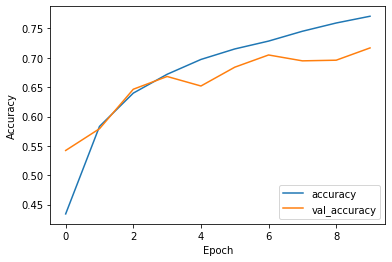

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6